In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
x_test=np.loadtxt("x_features_test.txt")
xs_test = x_test.shape
x_new_test = np.zeros((xs_test[0], xs_test[1]+1))
x_new_test[:, :-1] = x_test
x_new_test[:,-1]=((x_test[:,14]-x_test[:,11])/(x_test[:,5]-x_test[:,2]))
x_new_test[np.isinf(x_new_test)]=0.0
x_new_test.shape

/Users/jackie/.local/share/virtualenvs/machine-learning-Y7diJ1L1/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(1277, 51)

In [4]:
x_train=np.loadtxt("x_features_train.txt")
xs_train = x_train.shape
x_new_train = np.zeros((xs_train[0], xs_train[1]+1))
x_new_train[:, :-1] = x_train
x_new_train[:,-1]=((x_train[:,14]-x_train[:,11])/(x_train[:,5]-x_train[:,2]))
x_new_train[np.isinf(x_new_train)]=0.0
x_new_train.shape

/Users/jackie/.local/share/virtualenvs/machine-learning-Y7diJ1L1/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(2174, 51)

In [5]:
with open("y_labels_test.txt", "r") as fp:
    y_test = [x[:-1] for x in fp.readlines()]

In [6]:
with open("y_labels_train.txt", "r") as fp:
    y_train = [x[:-1] for x in fp.readlines()]

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(x_new_train, y_train)
clf.score(x_new_test,y_test)

0.4549725920125294

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(x_new_train, y_train)
model.score(x_new_test,y_test)

/Users/jackie/.local/share/virtualenvs/machine-learning-Y7diJ1L1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jackie/.local/share/virtualenvs/machine-learning-Y7diJ1L1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for al

0.6844166014095536

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_new_train, y_train)
neigh.score(x_new_test,y_test)

0.754894283476899

In [14]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_new_train, y_train)
neigh.score(x_new_test,y_test)

0.7564604541895067

In [18]:
x_new_train.shape

(2174, 51)

In [19]:
#drop unnecessary keypoints

In [20]:
# Delete column at index 2 & 3
x_new_train2 = np.delete(x_new_train, [3,4,6,7,15,16,17,18,28,29,31,32,40,41,42,43], axis=1)
x_new_test2  = np.delete(x_new_test,  [3,4,6,7,15,16,17,18,28,29,31,32,40,41,42,43], axis=1)

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_new_train2, y_train)
neigh.score(x_new_test2,y_test)

0.7361002349256069

In [23]:
x_new_test2.shape

(1277, 35)

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x_new_train2, y_train)
clf.score(x_new_test2,y_test)

0.5473766640563822

In [29]:
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x_new_train, y_train)
clf.score(x_new_test,y_test)

0.4581049334377447

In [30]:
from sklearn import svm
clf_svc = svm.SVC()
clf_svc.fit(x_new_train2, y_train)
clf_svc.score(x_new_test2,y_test)

0.7791699295223179

In [31]:
from sklearn import svm
clf_svc = svm.SVC()
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8386844166014096

Normalized confusion matrix
[[0.7338403  0.2661597  0.        ]
 [0.         1.         0.        ]
 [0.05827068 0.19736842 0.7443609 ]]


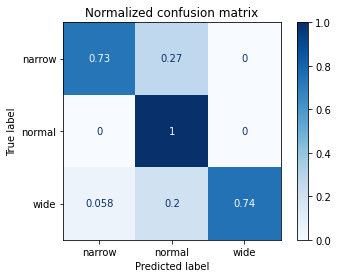

In [32]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_svc, x_new_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()
#plt.savefig('confusion_matrix_ovr_logistic01.png')

In [33]:
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8026624902114331

In [34]:

clf_svc = svm.SVC(decision_function_shape='ovo')
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8386844166014096